<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Examples
This notebook demonstrates basic examples for different types of neural networks: Feedforward Neural Network (FFNN), Recurrent Neural Network (RNN), Long Short-Term Memory (LSTM), Convolutional Neural Network (CNN), and Graph Convolutional Network (GCN).

## Feedforward Neural Network (FFNN)
Feedforward networks are the simplest form of neural networks, where information moves in one direction from input to output without cycles. They are often used for basic classification tasks.

In [6]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # since it already calculated stddev and mean.

print (X_train.shape[1]) #X_train.shape[0]: The number of rows and X_train.shape[1]: The number of columns

# Build FFNN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Adaptive Moment Estimation (adam) adjusts the weights of neurons dynamically and efficiently during training.

# loss function It measures how well the predicted probabilities from the model match the actual labels.
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


4
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0880 - loss: 1.1864 - val_accuracy: 0.0833 - val_loss: 1.1139
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2877 - loss: 1.1219 - val_accuracy: 0.2500 - val_loss: 1.0497
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4188 - loss: 1.0371 - val_accuracy: 0.7083 - val_loss: 0.9876
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5889 - loss: 0.9579 - val_accuracy: 0.8750 - val_loss: 0.9300
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.8911 - val_accuracy: 0.8333 - val_loss: 0.8651
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7942 - loss: 0.8000 - val_accuracy: 0.8333 - val_loss: 0.8009
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7717 - loss: 0.6955 - val_accuracy: 0.8333 - val_loss: 0.7359
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7750 - loss: 0.6230 - val_accuracy: 0.8333 - val_loss: 0.6773
Ep

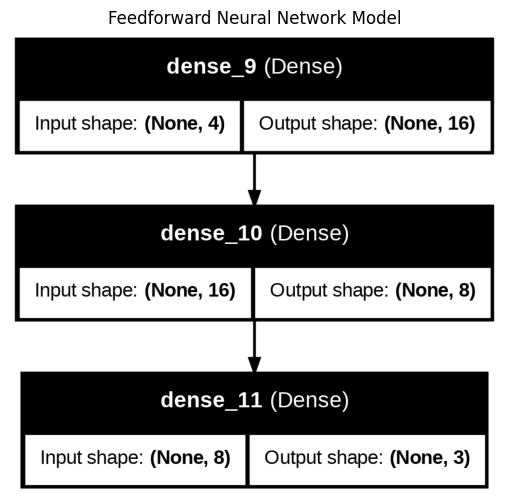

In [5]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the FFNN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),  # Assuming 10 input features
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Save the model plot to a file
plot_model(model, to_file='ffnn_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('ffnn_model.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Feedforward Neural Network Model")
plt.show()


## Recurrent Neural Network (RNN)
RNNs are designed for sequential data, such as time series or text. Here, we demonstrate a simple RNN for predicting sequences.

In [ ]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic sequential data
X = np.array([i for i in range(100)]).reshape(10, 10, 1)  # 10 sequences of 10 time steps
y = np.array([sum(i) for i in X])  # Sum of each sequence

# Build RNN model
rnn_model = Sequential([
    SimpleRNN(16, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Compile and train the model
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X, y, epochs=20, batch_size=2)

# Predict on a sample sequence
sample_seq = np.array([i for i in range(10, 20)]).reshape(1, 10, 1)
predicted_sum = rnn_model.predict(sample_seq)
print(f"Predicted sum for sequence [10-19]: {predicted_sum[0][0]:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 357377.7188
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325911.2500 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 294640.6562 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 213811.4844
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259586.1875 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 166939.1250 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204184.6094 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 148687.7500 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83664.2266  
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32706.4160 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1038.3777
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3379.8525 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6173.2788 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2767.9023
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

## Long Short-Term Memory (LSTM)
LSTMs handle long-term dependencies and are commonly used for tasks like sentiment analysis and language modeling. Below is an example with synthetic data to illustrate long-term dependency handling.

In [ ]:

from tensorflow.keras.layers import LSTM

# Generate synthetic sequential data for LSTM
X = np.array([i for i in range(200)]).reshape(20, 10, 1)  # 20 sequences of 10 time steps
y = np.array([sum(i) for i in X])  # Sum of each sequence

# Build LSTM model
lstm_model = Sequential([
    LSTM(32, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, y, epochs=20, batch_size=2)

# Predict on a sample sequence
sample_seq = np.array([i for i in range(20, 30)]).reshape(1, 10, 1)
predicted_sum = lstm_model.predict(sample_seq)
print(f"Predicted sum for sequence [20-29]: {predicted_sum[0][0]:.2f}")


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1213567.6250
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 949537.3125 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 998933.6875   
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1573811.7500
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1057639.7500 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 816222.8750  
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 444299.4062 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39904.5000  
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6569.8223  
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2600.1833 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4024.8240
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1802.6459 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 666.8691
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 176.3292
Epoch 15/20
1

## Convolutional Neural Network (CNN)
CNNs are specialized for grid-like data, such as images. This example demonstrates image classification using the MNIST dataset.

In [ ]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.reshape(-1, 28, 28, 1) / 255.0, X_test.reshape(-1, 28, 28, 1) / 255.0

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
489/844 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8250 - loss: 0.5875

## Graph Convolutional Network (GCN)
GCNs are designed to work on data structured as graphs, such as social networks or molecular structures. Here, we show a simplified example using synthetic graph data.

In [ ]:

import tensorflow as tf
from spektral.layers import GraphConv
from spektral.data import Graph, Dataset
import numpy as np

# Creating a synthetic graph dataset
class SimpleGraph(Dataset):
    def read(self):
        x = np.eye(5)  # Node features (identity matrix)
        a = np.array([[0, 1, 0, 1, 0], [1, 0, 1, 0, 1], [0, 1, 0, 1, 0], [1, 0, 1, 0, 1], [0, 1, 0, 1, 0]])  # Adjacency
        y = np.array([1, 0, 1, 0, 1])  # Labels for nodes
        return [Graph(x=x, a=a, y=y)]

dataset = SimpleGraph()

# Build a GCN model
gcn_model = Sequential([
    GraphConv(16, activation='relu', input_shape=(5,)),
    GraphConv(1, activation='sigmoid')
])

# Compile and print model summary
gcn_model.compile(optimizer='adam', loss='binary_crossentropy')
print("GCN model ready for training on synthetic graph data.")
